# Python For Traders and Investors - Chapter 3

## 3.1 Build VWAP From a Text File

To bring it all together, let's calculate the volume weighted average price (VWAP) for our price data. Once you understand this, you are not so far from building your own backtests. For the VWAP calculation we need the daily close prices and the volumes. We need to re-open the file, so we can start again from the first value.

Secondly, for a VWAP we need a lookback period for which we can calculate the average. Let's use a 20-day window. In order to store the values we can write them to a list and then do some calculations with that list. Writing values to a list is easy. First, we need to initialize the list:

In [1]:
my_values = []

In [2]:
# Next, we put values in the list:
my_values.append(12.64)
my_values.append(1.04)
my_values

[12.64, 1.04]

In a list we can even mix different data types:

In [3]:
my_values.append('hello world')
my_values

[12.64, 1.04, 'hello world']

Now we have enough knowledge to build our VWAP function:

__N.B. Colab users: please un-comment the following box of code to upload 'output.csv' to Colab, and then select 'output.csv' as the file to upload.__

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [34]:
# Initialising lists 
close_prices = []
volumes = []

# Opening file
fid = open('output.csv')
fid.readline() 
for i in fid:
    line = i.strip().split(',')
    cl = float(line[4])
    vol = float(line[5])
    close_prices.append(cl)
    volumes.append(vol)

When we run this code, we produce two lists, one for close prices and one for volumes. Let's look at the list with the volumes. Often, we don't really want to look at all the values at once, but maybe just the first 5. For lists we cannot use the head() function as we did earlier for Pandas data frames. We use indexing instead, which is just as easy.

In [6]:
volumes[0:5]

[88102700.0, 123432400.0, 150476200.0, 138040000.0, 119282800.0]

In Python we don't even need to specify the zeros and we can simpy do this:

In [7]:
volumes[:5]

[88102700.0, 123432400.0, 150476200.0, 138040000.0, 119282800.0]

Let's print the last 5 values:

In [8]:
volumes[-5:]

[29596800.0, 27218000.0, 33019800.0, 42527100.0, 34488110.0]

Note, the minus sign in the index. It is easy to see that we can pick out any set of values from our list:

In [9]:
volumes[20:25]

[187469100.0, 174585600.0, 153832000.0, 189413000.0, 212576700.0]

Now that we have the lists we are ready to do some maths. There is a package that is perfect for that called numpy. It allows us to do a wide range of calculations with lists and arrays. In order to avoid having to type the word numpy every time, by convention we import it as **np** like this:

In [10]:
import numpy as np

Let's do some calculations:

In [11]:
np.multiply(close_prices, volumes)

array([2.65226890e+09, 3.77368110e+09, 4.60844097e+09, ...,
       1.00112732e+10, 1.31676662e+10, 1.07026947e+10])

We can see that this operation returns something that is called *array*. An array is a data type similar to a list but has some important differences:
- In a list each element can be stored anywhere in memory and has a pointer to the previous and the next element.
- To access a element in a list one has to start with the first element and travese the whole list until the right element is found.
- In an array each element is stored next to each other. Each element can be accessed directly without traversing.
- Arrays are smaller in size and much faster to access.
- With lists it is much easier to append and insert data, which is very inefficient with arrays.
- List and arrays can be converted into each other.

Right now, we don't need to worry to much what we should use, just be aware of the differences between the two.

With this we can now build our VWAP calculation:

In [12]:
# sum of daily_volume x price divided by total volume
np.sum(np.multiply(close_prices[:20],volumes[:20]))/np.sum(volumes[:20])

29.46821299893784

Let's compare that to the actual price on that day:

In [13]:
close_prices[19]

27.437143325805664

In [14]:
close_prices[20]

27.818571090698242

You might notice that we used index 19 rather than 20. This is because close_prices[0:20] actually gives us the 20 values from index 0 to 19. While this is confusing at first, Python does that to make everything else really easy. We just have to be aware that in slices (indices in square brackets with colons) the value before the colon is inclusive and the value after the colon exculsive. **This is really important to remember as it can be a major issue that introduces look-ahead errors when we run backtests**

In [15]:
close_prices = []
volumes = []
vwaps = []

In [16]:
fid = open('output.csv')
fid.readline() 

'Date,High,Low,Open,Close,Volume,Adj Close\n'

In [17]:
for i in fid:
    line = i.strip().split(',')
    cl = float(line[4])
    vol = float(line[5])
    close_prices.append(cl)
    volumes.append(vol)
    vwap = np.sum(np.multiply(close_prices[-20:],volumes[-20:]))/np.sum(volumes[-20:])
    vwaps.append(vwap)

In [18]:
fid.close()

Note that for the first lines the index [-20:] would be negative. Python ignores that and simply starts with zero. This means that at first our VWAP is built from less than 20 values.

## 3.2 Pandas for financial data

The Pandas package is probably the biggest reason why Python is so popular in finance. It provides a set of tools that makes it much easier to build quantitative analysis models. We already used some Pandas function above and now we dive into it much deeper. 

Pandas is similar to a database application like MySql but with many convenient functions on top of it. Its most important structure is a data frame, which is effectively a table with dated rows and different columns, just like what we've seen previously. Pandas sits on top on Numpy and most of the numpy mathematical functions can be used with Pandas, with the advantage that we now have dates along with our normal indices.

Let's start again by reading our file into a Pandas data frame. 

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('output.csv')
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,26.193771
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119


In [21]:
data = pd.read_csv('output.csv', index_col=0, parse_dates=True)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,26.193771
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119


In [22]:
data.index[0]

Timestamp('2009-12-31 00:00:00')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2524 entries, 2009-12-31 to 2020-01-10
Data columns (total 6 columns):
High         2524 non-null float64
Low          2524 non-null float64
Open         2524 non-null float64
Close        2524 non-null float64
Volume       2524 non-null float64
Adj Close    2524 non-null float64
dtypes: float64(6)
memory usage: 138.0 KB


In [24]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2524.000000,2524.000000,2524.000000,2524.000000,2.524000e+03,2524.000000
mean,111.801726,109.814683,110.814502,110.847061,7.478983e+07,104.581516
std,57.417136,56.504898,56.908016,57.012737,5.876732e+07,58.489450
min,28.000000,27.178572,27.481428,27.435715,1.136200e+07,23.871843
25%,65.406784,64.211786,65.062855,64.748930,3.117520e+07,57.133779
50%,100.450001,98.490002,99.285000,99.620003,5.529945e+07,92.199215
75%,153.467499,149.757504,151.342495,151.939999,1.015280e+08,146.973419
max,312.670013,308.250000,310.600006,310.329987,4.702495e+08,310.329987


In [25]:
import matplotlib.pyplot as plt

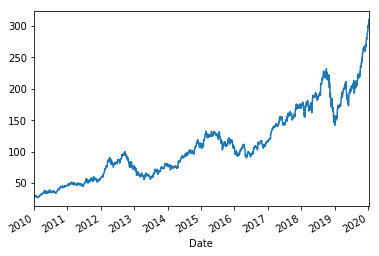

In [26]:
# Plotting a single column
data['Close'].plot()
plt.show()

## 3.3 Plotting time series data

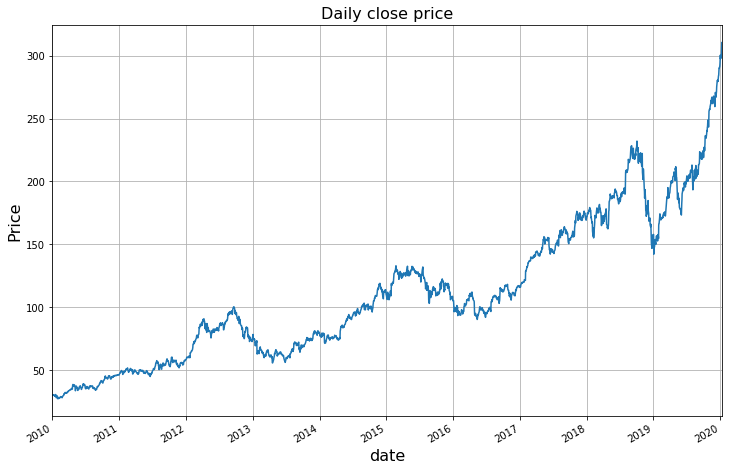

In [27]:
# Setting the figure size
plt.figure(figsize=(12,8))
data['Close'].plot()

# Setting the x, y labels and title
plt.xlabel('date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('Daily close price', fontsize=16)

# Add grid
plt.grid()
plt.show()

Lets plot the moving average:

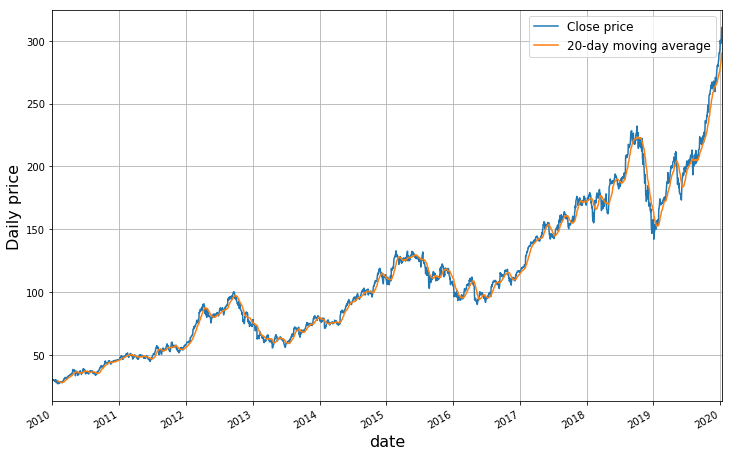

In [28]:
plt.figure(figsize=(12,8))
data['Close'].plot()

# 20-day moving average
data['Close'].rolling(20).mean().plot()

plt.xlabel('date', fontsize=16)
plt.ylabel('Daily price', fontsize=16)

# Add legends
plt.legend(['Close price', '20-day moving average'], fontsize=12)

plt.grid()
plt.show()

That was really easy! How about the VWAP? A bit harder but still only one line compared to 13 lines before:

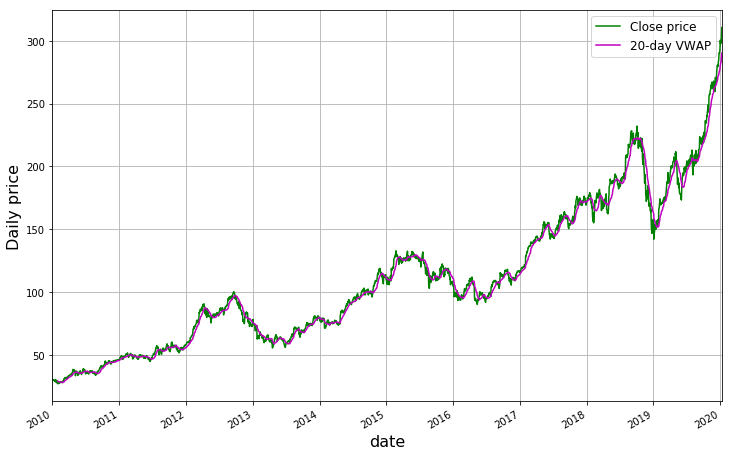

In [29]:
plt.figure(figsize=(12,8))
data['Close'].plot(color='g')

# 20-day VWAP
vwap = (data['Close']*data['Volume']).rolling(20).sum()/data['Volume'].rolling(20).sum()
vwap.plot(color='m')

plt.xlabel('date', fontsize=16)
plt.ylabel('Daily price', fontsize=16)

# Add legends
plt.legend(['Close price', '20-day VWAP'], fontsize=12)

plt.grid()
plt.show()

__daily ranges__

In [30]:
data['range'] = data['High'] - data['Low']
data.head()

,High,Low,Open,Close,Volume,Adj Close,range
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,26.193771,0.398571
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469,0.302856
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457,0.334286
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597,0.639999
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119,0.421429


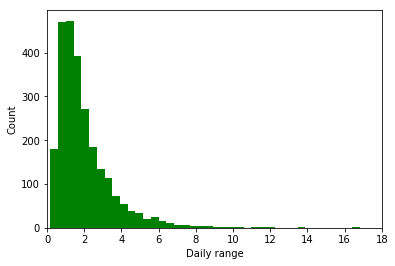

In [31]:
plt.hist(data['range'], bins=40, color='g')
plt.xlim([0, 18])
plt.xlabel('Daily range')
plt.ylabel('Count')
plt.show()